# Machine Learning Tutorial Python - 13: K Means Clustering Algorithm

- put random k (centriod) in data, get diff to clusters, split and optimize
- move k to center of mass of two clusters, split again
- repeat to optimize (do until data doesnt change)

---

- is interpretive; diff people see diff groups


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


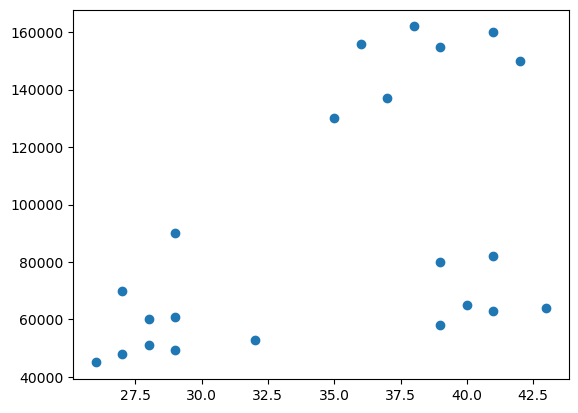

In [80]:
plt.scatter(df.Age, df["Income($)"])

In [81]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# k = 3 seem obvious
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [82]:
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [83]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income ($)')

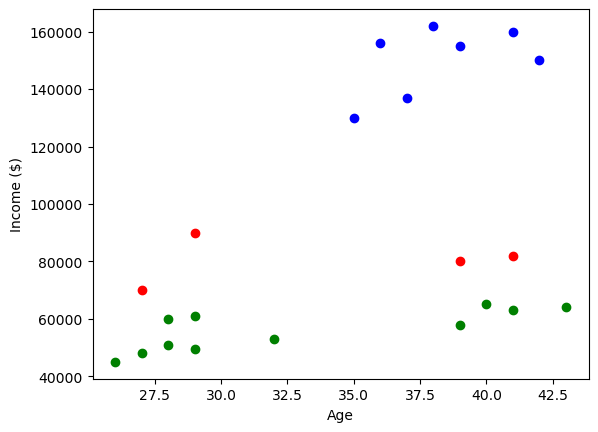

In [84]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1["Income($)"], c="r")
plt.scatter(df2.Age, df2["Income($)"], c="b")
plt.scatter(df3.Age, df3["Income($)"], c="g")

plt.xlabel("Age")
plt.ylabel("Income ($)")
# plt.legend()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])  # scales from 0 to 1

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])  # scales from 0 to 1

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [86]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
km.cluster_centers_  # centriods

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [88]:
df.cluster = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


Text(0, 0.5, 'Income ($)')

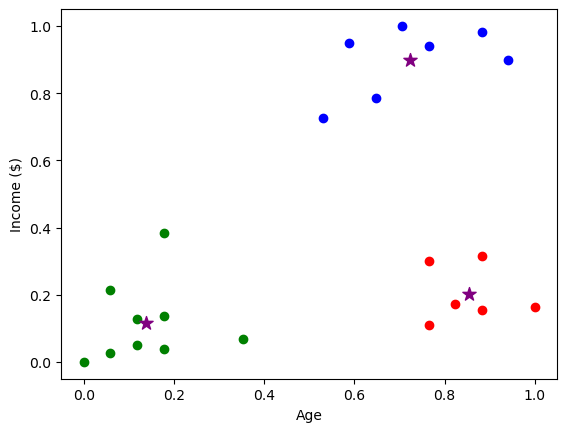

In [ ]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1["Income($)"], c="r")
plt.scatter(df2.Age, df2["Income($)"], c="b")
plt.scatter(df3.Age, df3["Income($)"], c="g")

plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    color="purple",
    marker="*",
    s=100,
)


plt.xlabel("Age")
plt.ylabel("Income ($)")

Text(0, 0.5, 'SSE')

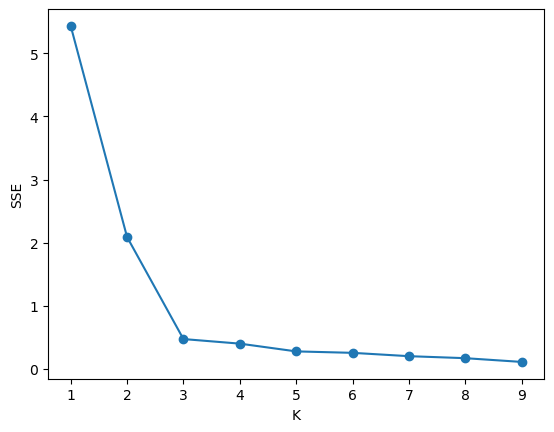

In [ ]:
# elbow plot to get k

k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)  # sum of square error

sse

plt.plot(k_rng, sse, marker="o")
plt.xlabel("K")
plt.ylabel("SSE")